Let's do 3+1 dimensions, consider $x^\mu \in \mathbb{R}^{1+3}$, where $f$ is the Fourier transform of a Gaussian:

\begin{align}
  [\phi(x), \phi(0)] = \int_{-\infty}^\infty \frac{\mathrm d^3p}{(2\pi)^3} \frac{f^2(|\vec p|)}{2 F_{\vec p}} \left( e^{-ip_\mu x^\mu} - e^{ip_\mu x^\mu}\right) \bigg\rvert_{p^0 = F_{\vec p}} \\
\end{align}

Choose spherical coordinates $\vec p = (r, \theta, \phi)$ with $\hat z$ direction along $\vec x$. Now let $t = x^0$ and $x = |\vec x|$. Assuming $m \neq 0$ and $\sigma \neq 0$, the integral simplifies to:

\begin{align}
  [\phi(x), \phi(0)] = -i \int_{0}^\infty \frac{\mathrm dr}{2\pi^2} t r^2 \, \mathrm{sinc}(rx) \, f^2(r^2) \, \mathrm{sinc}(t E_r f(r^2))
\end{align}

Rescale $r \mapsto r' = r/\sigma$ and instead of plotting a $t$ vs. $x$ diagram, plot the dimensionless quantities $t' = mt$ vs. $x' = mx$. Then the only parameter of this commutator is $\alpha = \sigma m$ with units of energy, up to an overall factor of $\sigma^{-2}$.

\begin{align}
  \left| [\phi(x), \phi(0)] \right| &= \frac{1}{\sigma^2} \cdot \frac{t'}{2\pi^2 \alpha} \int_0^\infty \mathrm dr \, r^2 \, e^{-r^2} \, \mathrm{sinc}\left(\frac{rx'}{\alpha}\right) \, \mathrm{sinc}\left(t' e^{-\frac12 r^2} \sqrt{\frac{r^2}{\alpha^2} + 1}\right)
\end{align}

Alternatively, rescale by $\alpha$ for:

\begin{align}
  \left| [\phi(x), \phi(0)] \right| &= \frac{1}{\sigma^2} \cdot \frac{t''}{2\pi^2} \int_0^\infty \mathrm dr \, r^2 \, e^{-r^2} \, \mathrm{sinc}\left(rx''\right) \, \mathrm{sinc}\left(t'' e^{-\frac12 r^2} \sqrt{r^2 + \alpha^2}\right)
\end{align}

In [1]:
from commutators import run1, run2, NUM_PROC

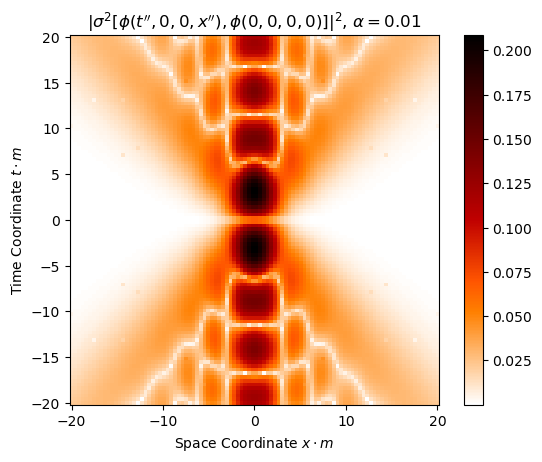

In [3]:
run1(20, 20, 100, 0.01, 1, hat_coords=True)

In [2]:
import multiprocess

alphas = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
          0.8, 0.9 , 1, 1.1, 1.2, 1.4, 1.5, 1.6, 1.8, 2,
          3,4, 5,6, 7,8, 9, 10]

mp_context = multiprocess.get_context("spawn")
with mp_context.Pool(processes=NUM_PROC) as pool:
    pool.map(run2, alphas)

#from tqdm.notebook import tqdm
#for s in tqdm():
#    run1(20, 20, 250, s, 1, log=False)
